In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense

In [2]:
path = 'https://raw.githubusercontent.com/bartk97/Anomaly-Detection/main/Data/ecg.csv'
df = pd.read_csv(path, header=None)
newly_loaded_data = True

df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
n_rows, n_columns = df.shape
print('Number of rows:', n_rows)
print('Number of columns:', n_columns)
print('Missing data: ', df.isnull().sum().sum())

Number of rows: 4998
Number of columns: 141
Missing data:  0


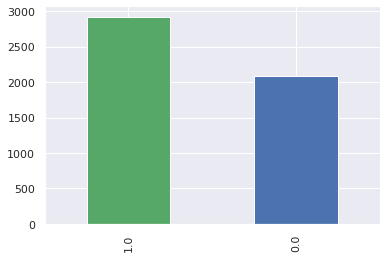

Labels:
1 - normal signal
0 - abnormal signal

1.0    2919
0.0    2079
Name: 140, dtype: int64


In [4]:
if newly_loaded_data:
  new_data = False

  df_label = df[n_columns - 1]
  df = df.drop(columns = [n_columns - 1])
  n_columns = n_columns - 1
  df_normal = df[df_label == 1]
  df_abnormal = df[df_label == 0]


df_label.value_counts().plot(kind='bar', color=['g', 'b'])
plt.show()

print('Labels:\n1 - normal signal\n0 - abnormal signal\n')
print(df_label.value_counts())

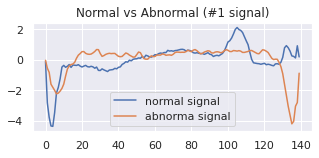

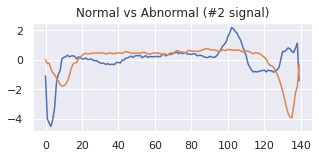

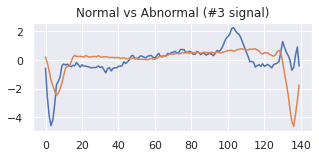

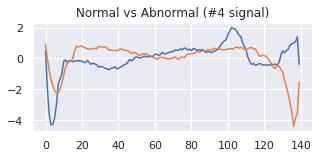

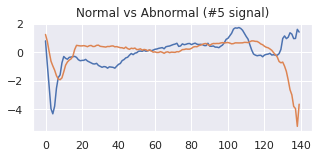

In [5]:
for i in range(5):
  title = 'Normal vs Abnormal (#' + str(i+1) + ' signal)'
  df_normal.iloc[i, :].plot(figsize=(5, 2), label='normal signal', title=title)
  df_abnormal.iloc[i, :].plot(label='abnorma signal')
  if i == 0: 
    plt.legend()
  plt.show()

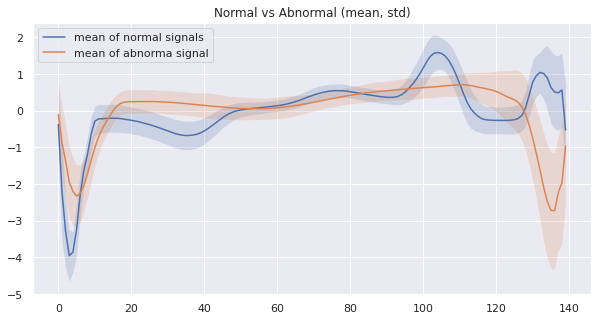

In [6]:
plt.figure(figsize=(10, 5))
plt.title('Normal vs Abnormal (mean, std)')
plt.plot(df_normal.mean(), label='mean of normal signals')
df_abnormal.mean().plot(label='mean of abnorma signal')
plt.fill_between(df.columns, df_normal.mean() + df_normal.std(), df_normal.mean() - df_normal.std(), alpha=0.2)
plt.fill_between(df.columns, df_abnormal.mean() + df_abnormal.std(), df_abnormal.mean() - df_abnormal.std(), alpha=0.2)
plt.legend()
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.30)

In [8]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_normal_train = X_train[y_train == 1]
X_normal_test = X_test[y_test == 1]
X_abnormal_train = X_train[y_train == 0]
X_abnormal_test = X_test[y_test == 0]

In [9]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = Sequential([
      Dense(128, activation="relu"),
      Dense(64, activation="relu"),
      Dense(32, activation="relu")])

    self.decoder = Sequential([
      Dense(64, activation="relu"),
      Dense(128, activation="relu"),
      Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [10]:
autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss='mae')

history = autoencoder.fit(X_normal_train, X_normal_train, epochs=150, batch_size=250, validation_split=0.2, shuffle=True)

Epoch 1/150
7/7 [==============================] - 2s 90ms/step - loss: 0.1341 - val_loss: 0.1135
Epoch 2/150
7/7 [==============================] - 0s 21ms/step - loss: 0.1002 - val_loss: 0.0825
Epoch 3/150
7/7 [==============================] - 0s 22ms/step - loss: 0.0742 - val_loss: 0.0631
Epoch 4/150
7/7 [==============================] - 0s 15ms/step - loss: 0.0584 - val_loss: 0.0526
Epoch 5/150
7/7 [==============================] - 0s 17ms/step - loss: 0.0504 - val_loss: 0.0476
Epoch 6/150
7/7 [==============================] - 0s 17ms/step - loss: 0.0468 - val_loss: 0.0459
Epoch 7/150
7/7 [==============================] - 0s 13ms/step - loss: 0.0456 - val_loss: 0.0451
Epoch 8/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0449 - val_loss: 0.0445
Epoch 9/150
7/7 [==============================] - 0s 19ms/step - loss: 0.0444 - val_loss: 0.0441
Epoch 10/150
7/7 [==============================] - 0s 20ms/step - loss: 0.0438 - val_loss: 0.0431
Epoch 11/150
7/7 [=

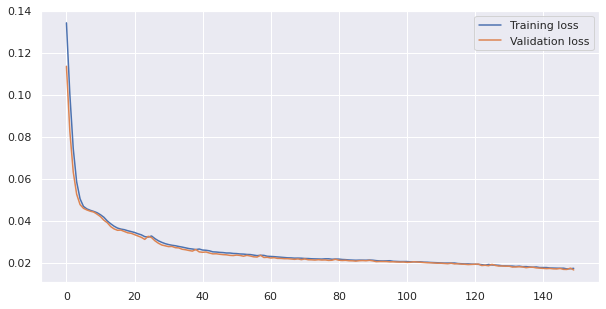

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

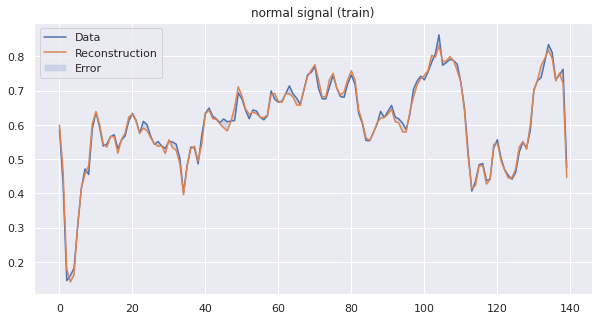

Error:  0.01361461279864416


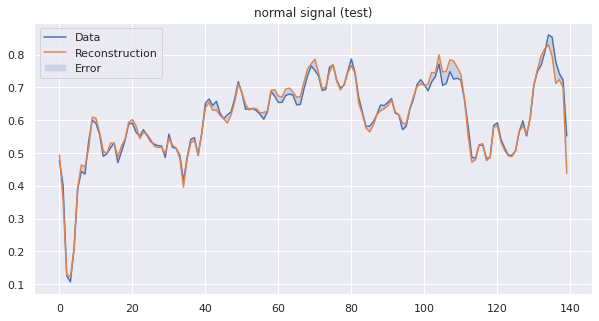

Error:  0.019609746531091127


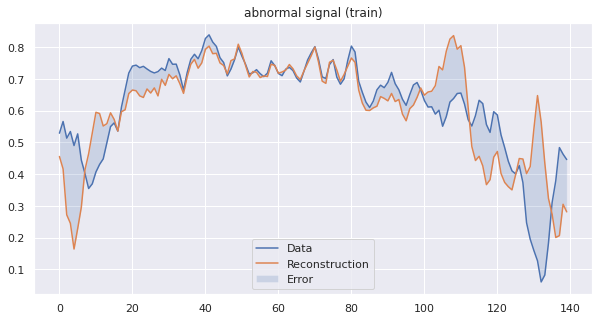

Error:  0.1236188358071155


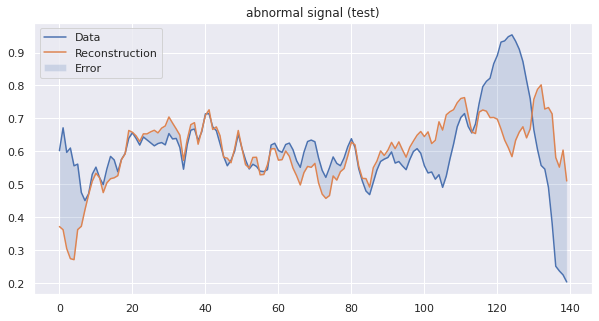

Error:  0.1273223544308103


In [12]:
dic = {'normal signal (train)': X_normal_train, 
       'normal signal (test)': X_normal_test, 
       'abnormal signal (train)': X_abnormal_train, 
       'abnormal signal (test)': X_abnormal_test}

for name, X_set in dic.items():

  encoded_data = autoencoder.encoder(X_set).numpy()
  decoded_data = autoencoder.decoder(encoded_data).numpy()

  plt.figure(figsize=(10, 5))
  plt.title(name)
  plt.plot(X_set[0], label='Data')
  plt.plot(decoded_data[0], label='Reconstruction')
  plt.fill_between(np.arange(140), decoded_data[0], X_set[0], alpha=0.2, label='Error')
  plt.legend()
  plt.show()

  print('Error: ', np.sqrt(np.mean((X_set[0] - decoded_data[0])**2)))

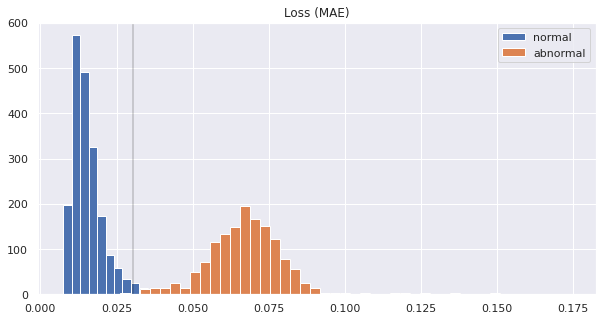

In [13]:
reconstruction_normal = autoencoder.predict(X_normal_train)
loss_normal_train = tf.keras.losses.mae(reconstruction_normal, X_normal_train)

reconstruction_abnormal = autoencoder.predict(X_abnormal_train)
loss_abnormal_train = tf.keras.losses.mae(reconstruction_abnormal, X_abnormal_train)

quantile = np.quantile(loss_normal_train, 0.95)

plt.figure(figsize=(10, 5))
plt.title('Loss (MAE)')
plt.hist(loss_normal_train, bins=50, label='normal')
plt.hist(loss_abnormal_train, bins=50, label='abnormal')
plt.axvline(quantile, color='black', alpha=0.2)
plt.legend()
plt.show()

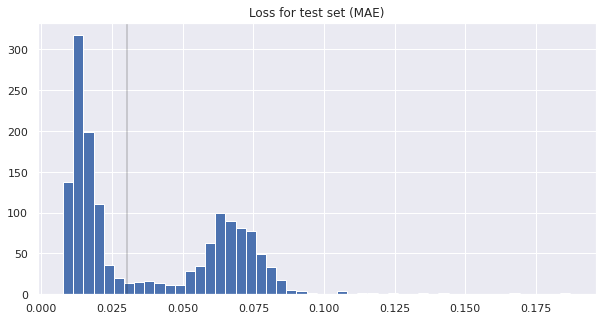

In [14]:
reconstruction_test = autoencoder.predict(X_test)
loss_test = tf.keras.losses.mae(reconstruction_test, X_test)

plt.figure(figsize=(10, 5))
plt.title('Loss for test set (MAE)')
plt.hist(loss_test, bins=50)
plt.axvline(quantile, color='black', alpha=0.2)
plt.show()

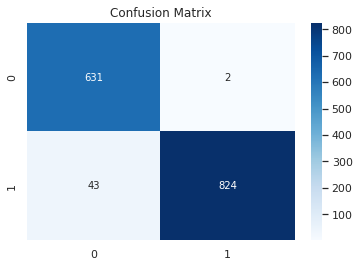

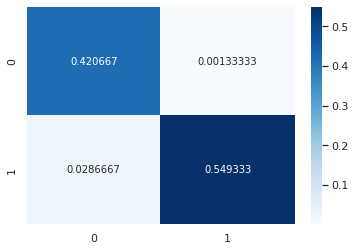

Labels:
1 - normal signal
0 - abnormal signal

Accuracy:  0.97


In [15]:
y_pred = np.where(loss_test.numpy() >= quantile, 0, 1)

cf_matrix = confusion_matrix(y_test, y_pred) 
plt.title('Confusion Matrix')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.show()

sns.heatmap(cf_matrix / X_test.shape[0], annot=True, cmap='Blues', fmt='g')
plt.show()

print('Labels:\n1 - normal signal\n0 - abnormal signal\n')
print('Accuracy: ', accuracy_score(y_test, y_pred))

True:  1.0
Predicted:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an ar

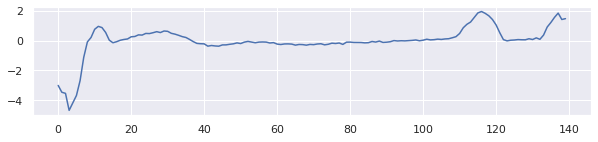

True:  1.0
Predicted:  0


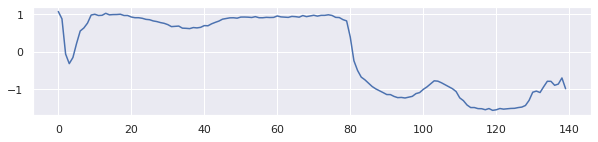

True:  1.0
Predicted:  0


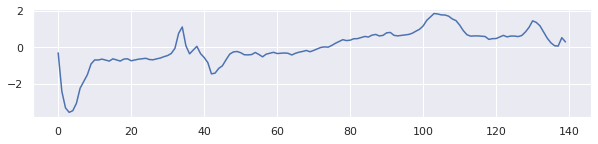

True:  1.0
Predicted:  0


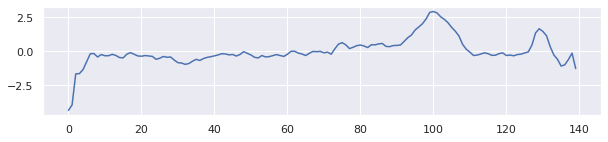

True:  1.0
Predicted:  0


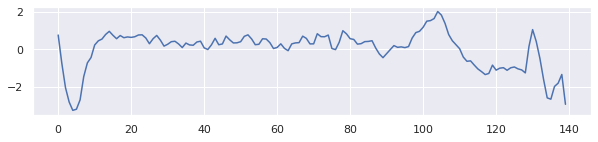

True:  1.0
Predicted:  0


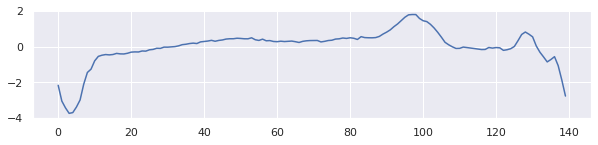

True:  1.0
Predicted:  0


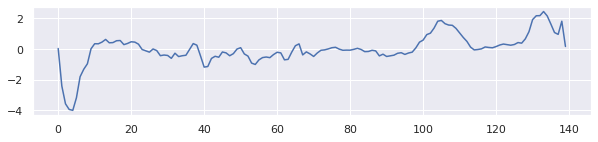

True:  1.0
Predicted:  0


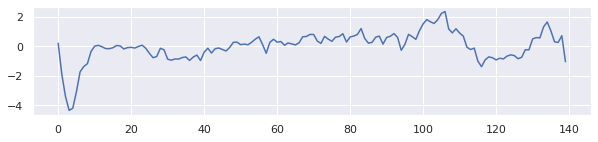

True:  1.0
Predicted:  0


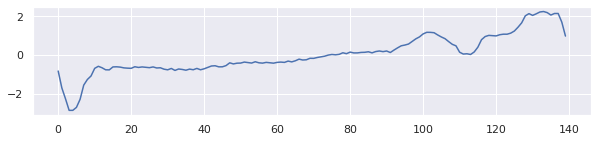

True:  1.0
Predicted:  0


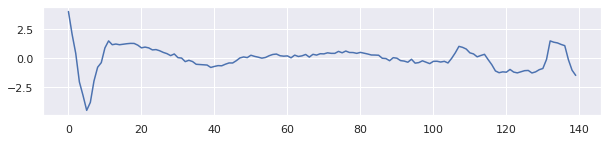

True:  1.0
Predicted:  0


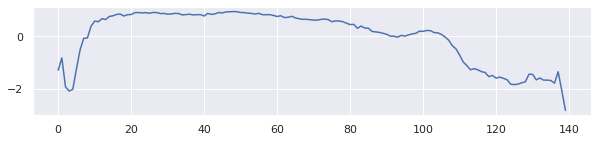

True:  1.0
Predicted:  0


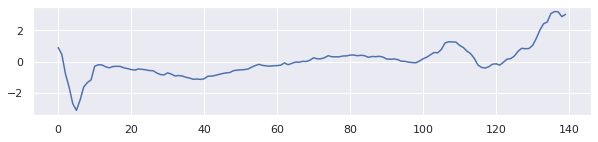

True:  1.0
Predicted:  0


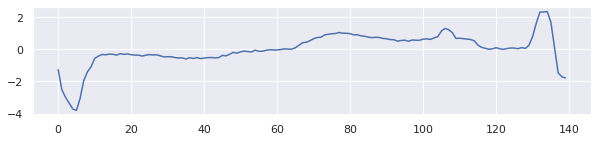

True:  1.0
Predicted:  0


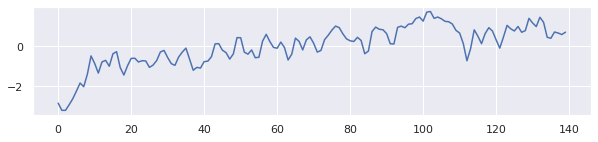

True:  1.0
Predicted:  0


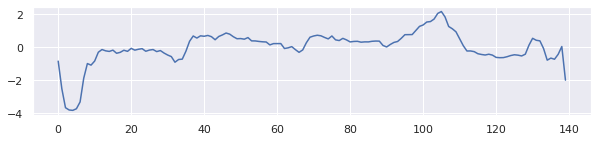

True:  1.0
Predicted:  0


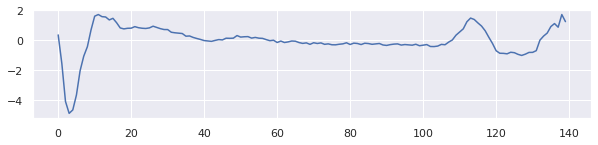

True:  1.0
Predicted:  0


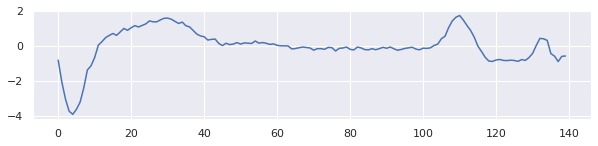

True:  1.0
Predicted:  0


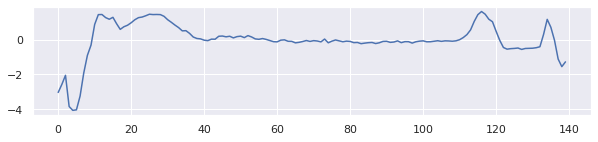

True:  1.0
Predicted:  0


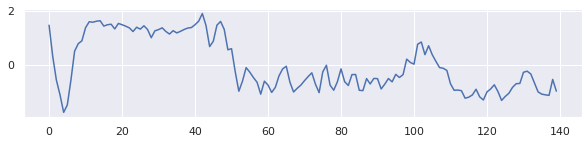

True:  1.0
Predicted:  0


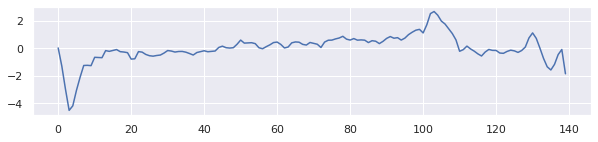

True:  1.0
Predicted:  0


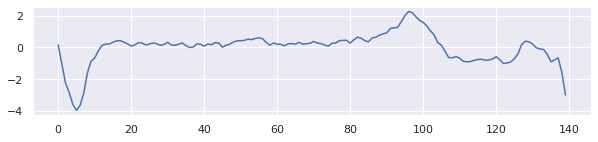

True:  1.0
Predicted:  0


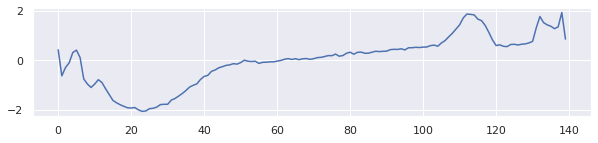

True:  1.0
Predicted:  0


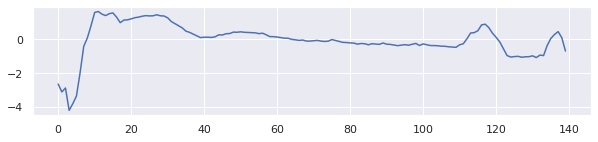

True:  1.0
Predicted:  0


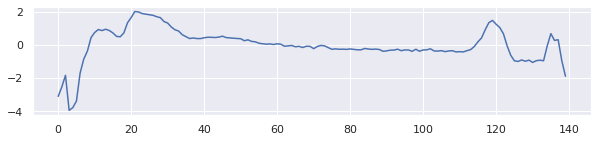

True:  1.0
Predicted:  0


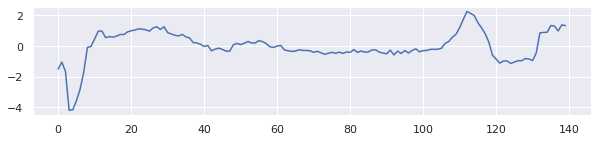

True:  1.0
Predicted:  0


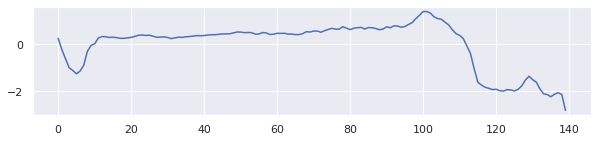

True:  1.0
Predicted:  0


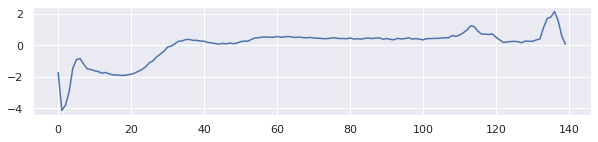

True:  1.0
Predicted:  0


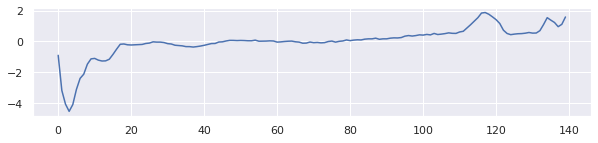

True:  1.0
Predicted:  0


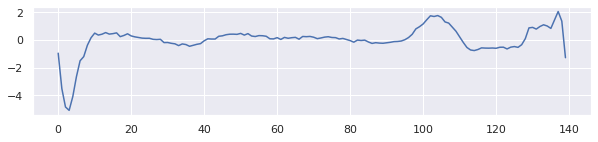

True:  1.0
Predicted:  0


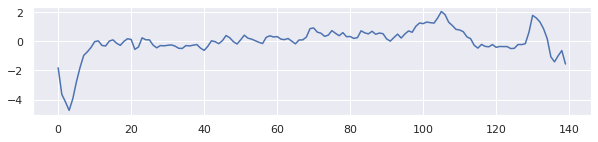

True:  0.0
Predicted:  1


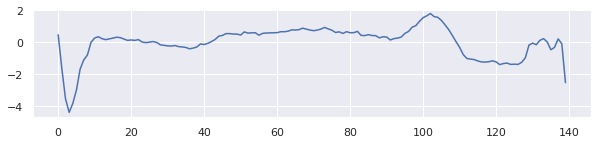

True:  0.0
Predicted:  1


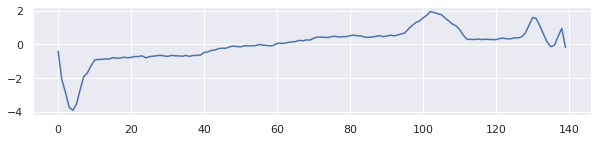

True:  1.0
Predicted:  0


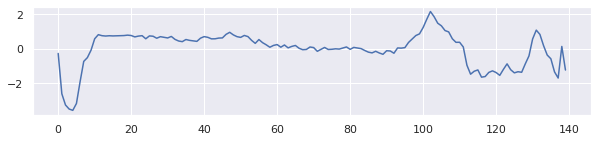

True:  1.0
Predicted:  0


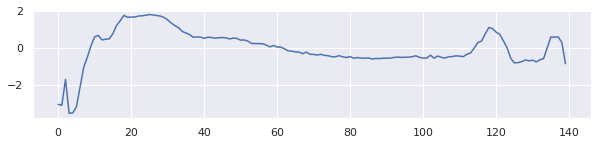

True:  1.0
Predicted:  0


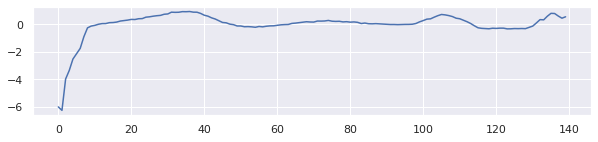

True:  1.0
Predicted:  0


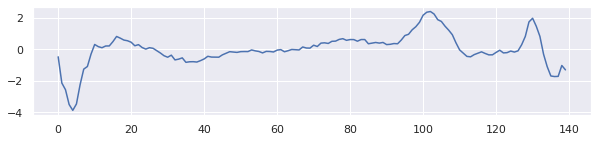

True:  1.0
Predicted:  0


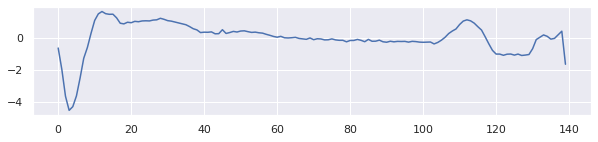

True:  1.0
Predicted:  0


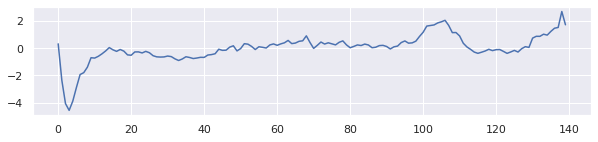

True:  1.0
Predicted:  0


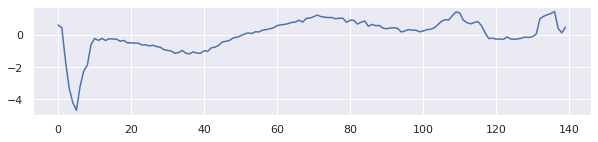

True:  1.0
Predicted:  0


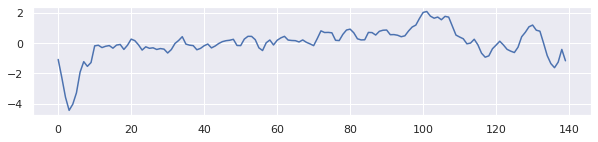

True:  1.0
Predicted:  0


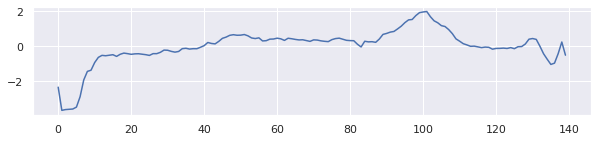

True:  1.0
Predicted:  0


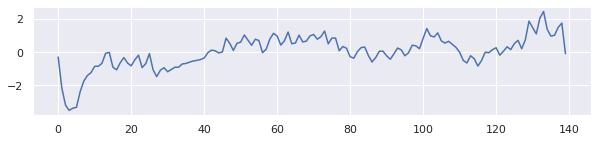

True:  1.0
Predicted:  0


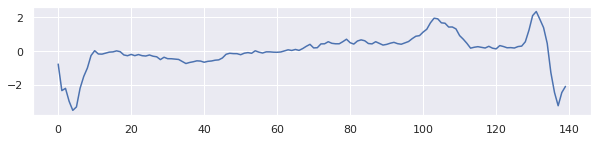

True:  1.0
Predicted:  0


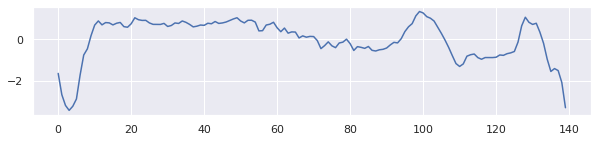

True:  1.0
Predicted:  0


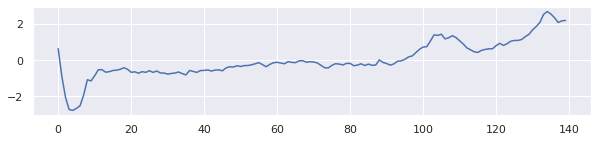

In [16]:
mask = [y_test != y_pred]
false = scaler.inverse_transform(X_test[mask])
y_test_false = y_test.to_numpy()[mask]
y_pred_false = y_pred[mask]

for i in range(false.shape[0]):
  plt.figure(figsize=(10, 2))
  print('True: ',  y_test_false[i])
  print('Predicted: ',  y_pred_false[i])
  plt.plot(false[i])
  plt.show()